# Single Layer Neural Network Example

Builds a simple neural network with TensorFlow ([code](https://github.com/michaelmendoza/learning-tensorflow/blob/master/examples/mnist/basic-net.py))

### MNIST Dataset Overview

The MNIST database is a large dataset of handwritten digits used for training image processing algorthms. This data set has 50,000 training example images, and 10,000 testing images. Each image has been flatted from an array of size (28,28) to a 1-D numpy array with 784 features (28 * 28). 

### Code Overview

1. Import Libraries
2. Load Data
3. Create Tensorflow Computation Graph:
    1. Create Network Varibles and Placeholders
    2. Create Network Architecture
    3. Define Loss Function and Optimizer
    4. Create Model Evalution Function
4. Run Tensorflow Computation Graph
    1. Initize TF Session
    2. Train Network
    3. Test Network
5. Plot Accuracy Results

### Example Code

Import necessary libraries:

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Next using tensorflow api we can download and load the MNIST data set:

In [3]:
# Import Dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Set training parameter's and network paramters:

In [4]:
# Training Parameters
learning_rate = 0.1
num_steps = 5000
batch_size = 128
display_step = 100

# Network Parameters
NUM_INPUTS = 784
NUM_OUTPUTS = 10

Create Network Varibles and Placeholders:

In [5]:
# Network Varibles and placeholders
x = tf.placeholder(tf.float32, [None, NUM_INPUTS])   # Input
y_ = tf.placeholder(tf.float32, [None, NUM_OUTPUTS]) # Truth Data - Output
W = tf.Variable(tf.zeros([NUM_INPUTS, NUM_OUTPUTS])) # Weights for layer
b = tf.Variable(tf.zeros([NUM_OUTPUTS]))             # Bias for layer

Create Network Architecture:

In [6]:
# Network Architecture - Single Layer Perception with Softmax Activation Function
y = tf.nn.softmax(tf.matmul(x, W) + b)

Define Loss Function and Optimizer:

In [7]:
# Define loss and optimizer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) # Loss 
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
trainer = optimizer.minimize(cross_entropy)

Create a Metric to Evalute Model Accuracy:

In [8]:
# Evaluate model accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Initalize Tensorflow Session:

In [9]:
# Initalize varibles, and run network
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Train and Test Network:

In [10]:
# Train network
_step = []
_acc = []
for step in range(num_steps):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    sess.run( trainer, feed_dict={x: batch_xs, y_: batch_ys} )

    if(step % display_step == 0):
      acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels})

      _step.append(step)
      _acc.append(acc)
      print("Step: " + str(step) + " Test Accuracy: " + str(acc)) 

Step: 0 Test Accuracy: 0.2272
Step: 100 Test Accuracy: 0.8644
Step: 200 Test Accuracy: 0.8843
Step: 300 Test Accuracy: 0.8927
Step: 400 Test Accuracy: 0.898
Step: 500 Test Accuracy: 0.9011
Step: 600 Test Accuracy: 0.9035
Step: 700 Test Accuracy: 0.906
Step: 800 Test Accuracy: 0.9072
Step: 900 Test Accuracy: 0.9082
Step: 1000 Test Accuracy: 0.9092
Step: 1100 Test Accuracy: 0.9104
Step: 1200 Test Accuracy: 0.9123
Step: 1300 Test Accuracy: 0.914
Step: 1400 Test Accuracy: 0.9135
Step: 1500 Test Accuracy: 0.9146
Step: 1600 Test Accuracy: 0.9162
Step: 1700 Test Accuracy: 0.9138
Step: 1800 Test Accuracy: 0.9145
Step: 1900 Test Accuracy: 0.9152
Step: 2000 Test Accuracy: 0.9168
Step: 2100 Test Accuracy: 0.9161
Step: 2200 Test Accuracy: 0.9164
Step: 2300 Test Accuracy: 0.9173
Step: 2400 Test Accuracy: 0.9174
Step: 2500 Test Accuracy: 0.9195
Step: 2600 Test Accuracy: 0.9192
Step: 2700 Test Accuracy: 0.9179
Step: 2800 Test Accuracy: 0.9183
Step: 2900 Test Accuracy: 0.918
Step: 3000 Test Accuracy: 

Plot Accuracy Results:

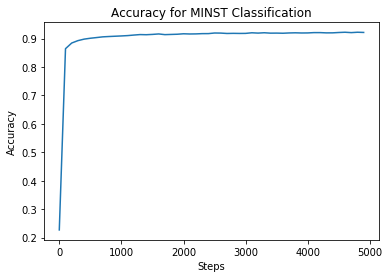

In [11]:
%matplotlib inline

# Plot Accuracy
plt.plot(_step, _acc, label="test accuracy")
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.title("Accuracy for MINST Classification")
plt.show()

Congrats!! You have gotten 90% test accuracy with a single layered perception